<a href="https://colab.research.google.com/github/adityapatil4141/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [661]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [662]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [663]:
# Load Dataset
df_names = pd.read_csv("/content/drive/MyDrive/work files /Project/Zomato Restaurant names and Metadata.csv")
df_reviews = pd.read_csv("/content/drive/MyDrive/work files /Project/Zomato Restaurant reviews.csv")

### Dataset First View

In [664]:
# Dataset First Look
df_names.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [665]:
df_reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [666]:
# Dataset Rows & Columns count
print("meta_data Rows & Columns count =",df_names.shape)
print("reviews dataset Rows & Columns count =",df_reviews.shape)

meta_data Rows & Columns count = (105, 6)
reviews dataset Rows & Columns count = (10000, 7)


### Dataset Information

In [667]:
# Dataset Info
df_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [668]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [669]:
# Dataset Duplicate Value Count
df_names.duplicated().sum()

0

In [670]:
df_reviews.duplicated().sum()

36

#### Missing Values/Null Values

In [671]:
# Missing Values/Null Values Count
print("meta_data null values count = ",df_names.isnull().sum())
print("reviews dataset null values count = ",df_reviews.isnull().sum())

meta_data null values count =  Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64
reviews dataset null values count =  Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


Text(0.5, 1.0, 'Null values in meta_data dataset')

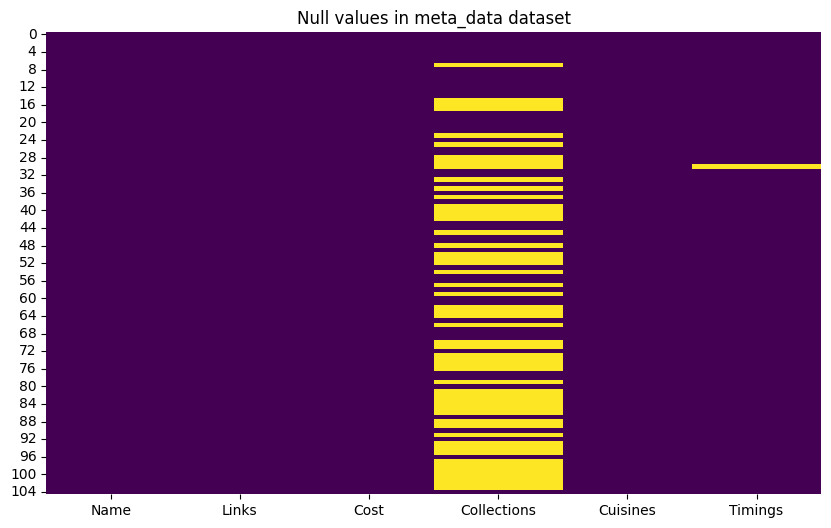

In [672]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(df_names.isnull(),cmap='viridis',cbar=False)
plt.title("Null values in meta_data dataset")

<Axes: >

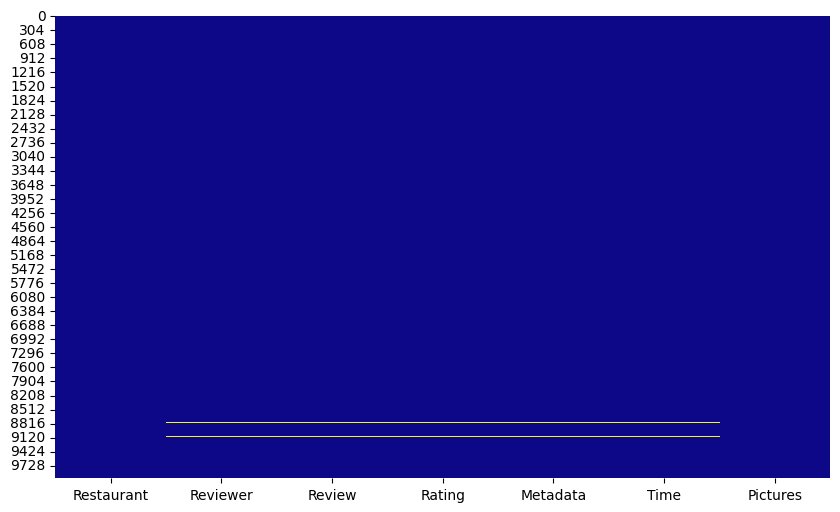

In [673]:
plt.figure(figsize=(10,6))
sns.heatmap(df_reviews.isnull(),cmap='plasma',cbar=False,annot=False)

### What did you know about your dataset?

There are two datasets (Metadata and Reviews). Names dataset provides information about resturants, cuisines,cost whereas reviews dataset provides information about cutomer reviews and rating. Metadata has no duplicate values but has 54 missing values, whereas review column has 197 total missing values and 36 duplicate values. metadata has 105 rows and 6 columns whereas review column has 10,000 rows and 7 columns.

## ***2. Understanding Your Variables***

In [674]:
# Dataset Columns
df_names.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [675]:
df_reviews.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [676]:
# Dataset Describe
df_names.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [677]:
df_reviews.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [678]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [679]:
# Write your code to make your dataset analysis ready.

# Column rename:
df_names.rename(columns={'Name': 'Restaurant'},inplace=True)
df_names=df_names[['Restaurant','Cost','Cuisines','Collections']]


In [680]:
df_names

,Restaurant,Cost,Cuisines,Collections
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","Food Hygiene Rated Restaurants in Hyderabad, C..."
1,Paradise,800,"Biryani, North Indian, Chinese",Hyderabad's Hottest
2,Flechazo,"1,300","Asian, Mediterranean, North Indian, Desserts","Great Buffets, Hyderabad's Hottest"
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever...",Late Night Restaurants
4,Over The Moon Brew Company,"1,200","Asian, Continental, North Indian, Chinese, Med...","Best Bars & Pubs, Food Hygiene Rated Restauran..."
...,...,...,...,...
100,IndiBlaze,600,"Fast Food, Salad",NaN
101,Sweet Basket,200,"Bakery, Mithai",NaN
102,Angaara Counts 3,500,"North Indian, Biryani, Chinese",NaN
103,Wich Please,250,Fast Food,NaN


In [681]:
df_names['Cost'].max()

'900'

In [682]:
# Converting Cost column into float/int Dtype:
df_names['Cost'] = df_names['Cost'].str.replace(",","" ).astype('int64')

<ipython-input-682-51db1953b52c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_names['Cost'] = df_names['Cost'].str.replace(",","" ).astype('int64')


In [683]:
# Findin and replacing null values.
df_names.isnull().sum()
df_names.fillna('unknown',inplace=True)

<Axes: >

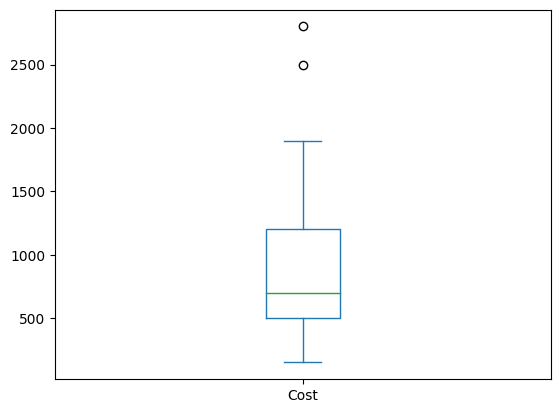

In [684]:
df_names.plot(kind='box')

<Axes: >

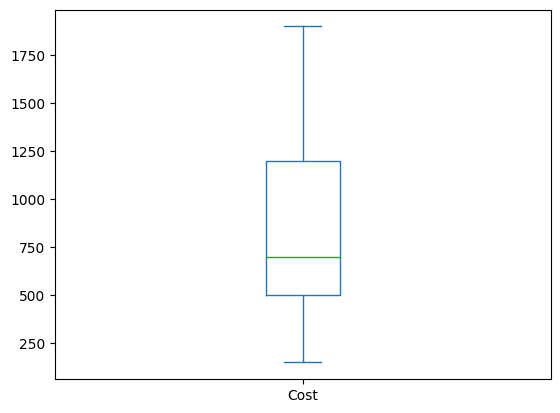

In [685]:
# Calculate IQR
Q1 = df_names['Cost'].quantile(0.25)
Q3 = df_names['Cost'].quantile(0.75)
IQR = Q3 - Q1

# Set a threshold (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify and remove outliers
df_names = df_names[(df_names['Cost'] >= Q1 - threshold * IQR) & (df_names['Cost'] <= Q3 + threshold * IQR)]

# Display DataFrame after removing outliers
df_names['Cost'].plot(kind='box')


### What all manipulations have you done and insights you found?

1. Removed unwanted columns 'Links' & 'Timings'.
2. Missing values handeling (filled them with 'unkown').
3. Changed column name from 'Name' ==> 'Restaurant'
4. Removed outliers

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [686]:
# Chart - 1 visualization code
df_names.head()

,Restaurant,Cost,Cuisines,Collections
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","Food Hygiene Rated Restaurants in Hyderabad, C..."
1,Paradise,800,"Biryani, North Indian, Chinese",Hyderabad's Hottest
2,Flechazo,1300,"Asian, Mediterranean, North Indian, Desserts","Great Buffets, Hyderabad's Hottest"
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever...",Late Night Restaurants
4,Over The Moon Brew Company,1200,"Asian, Continental, North Indian, Chinese, Med...","Best Bars & Pubs, Food Hygiene Rated Restauran..."


In [687]:
# Found how many restaurants has how much cost:
df_names['Cost'].value_counts()

500     13
600     10
700      8
1200     7
400      6
1000     6
200      5
800      5
1500     5
1300     4
350      3
1600     3
750      3
550      3
900      3
1100     3
1700     2
450      2
1400     2
150      2
1900     2
300      1
850      1
650      1
1800     1
1750     1
250      1
Name: Cost, dtype: int64

Text(0, 0.5, 'No.of restaurants')

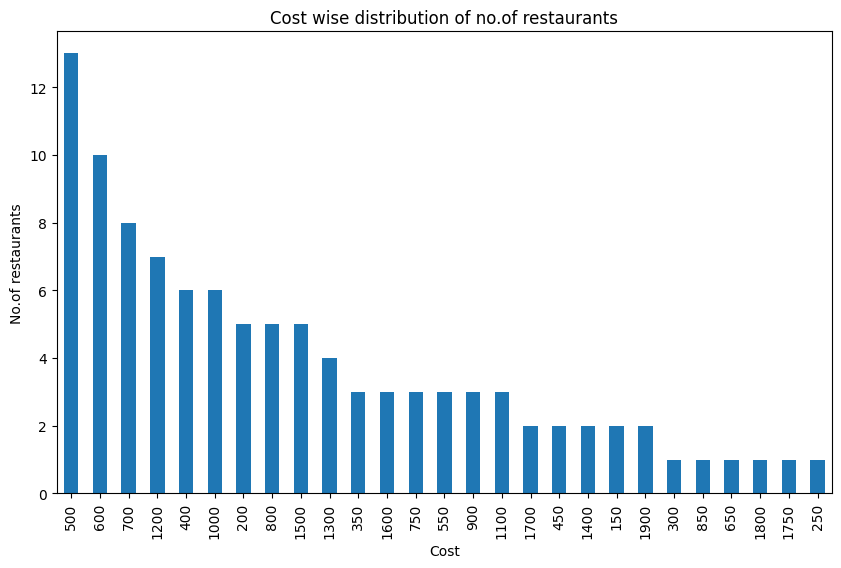

In [688]:
# Plotted Cost wise distribution of no. of restaurants:
plt.figure(figsize=(10,6))
df_names['Cost'].value_counts().plot(kind='bar')
plt.title("Cost wise distribution of no.of restaurants")
plt.xlabel("Cost")
plt.ylabel("No.of restaurants")

In [689]:
# Top 10 costliest restaurants:
costliest_restaurants_10 = df_names[['Restaurant','Cost']].nlargest(10,'Cost')

Text(0, 0.5, 'Restaurant')

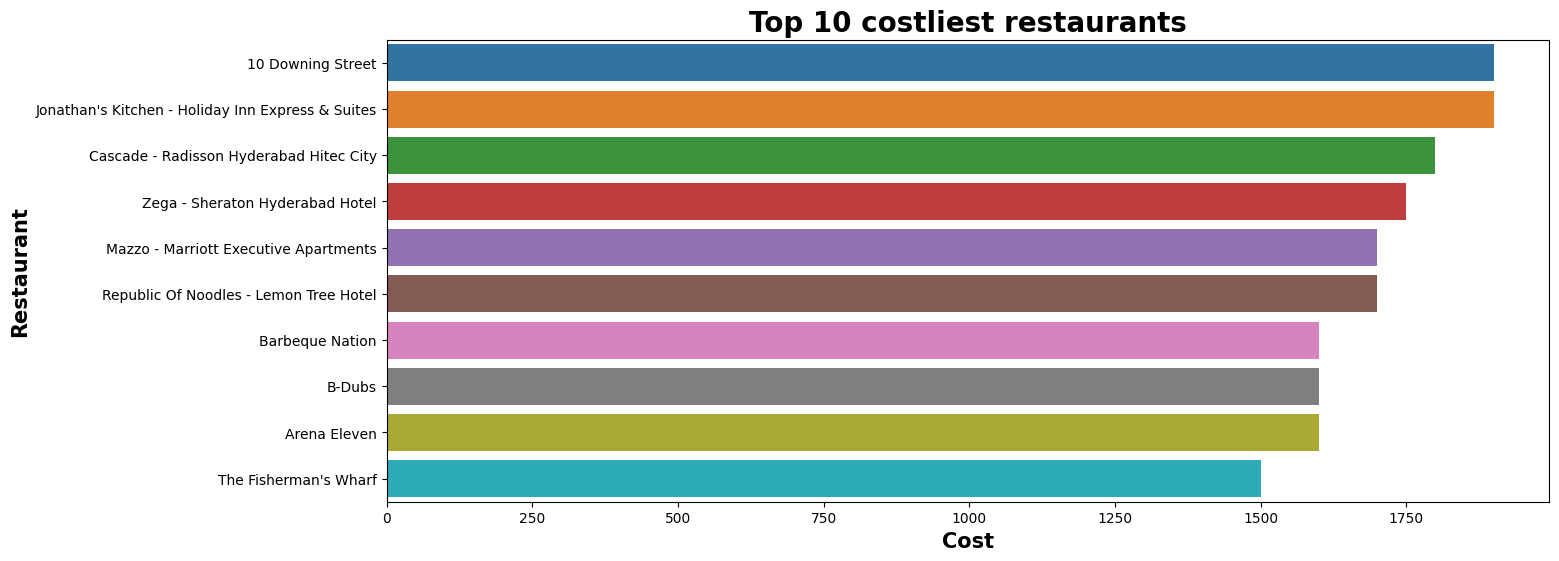

In [746]:
# Plotted top 10 costliest restaurants:
plt.figure(figsize=(15,6))
x = costliest_restaurants_10['Cost']
y = costliest_restaurants_10['Restaurant']
sns.barplot(x=x,y=y)
plt.title('Top 10 costliest restaurants',weight='bold',fontsize=20)
plt.xlabel('Cost',weight='bold',fontsize=15)
plt.ylabel('Restaurant',weight='bold',fontsize=15)

In [745]:
# Top 10 affordable restaurants:
affordable_restaurants = df_names[['Restaurant','Cost']].nsmallest(10,'Cost').sort_values('Cost',ascending=False)

Text(0, 0.5, 'Restaurant')

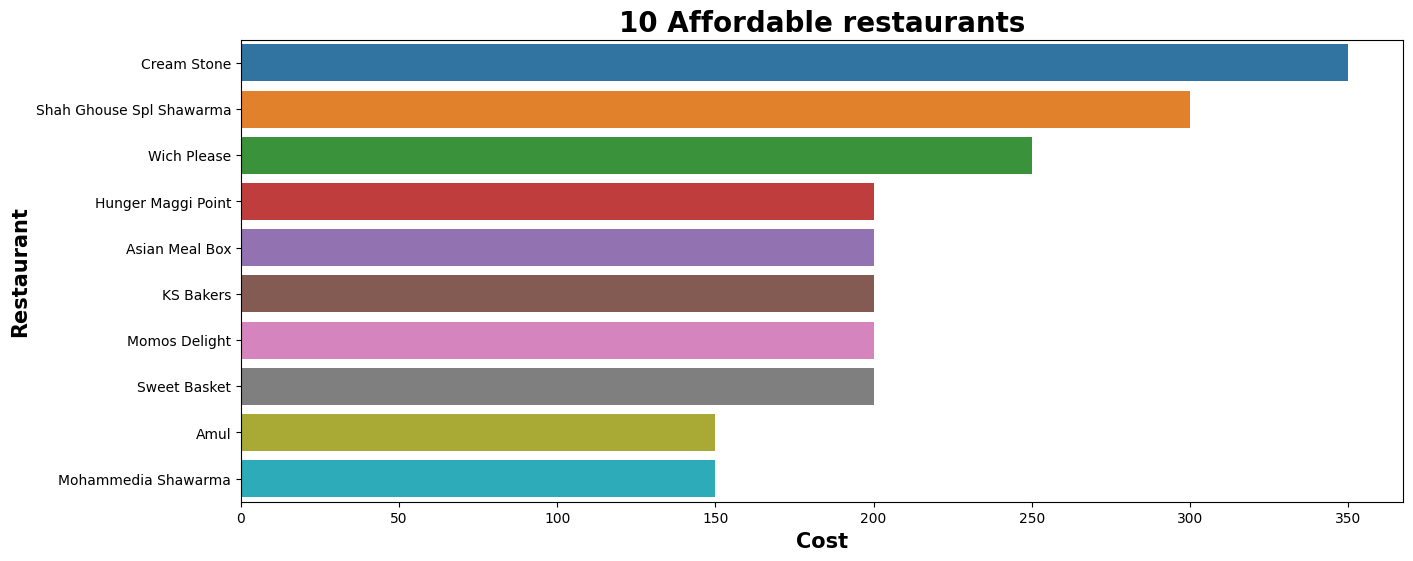

In [748]:
# Plotted top 10 affordable restaurants:
plt.figure(figsize=(15,6))
x = affordable_restaurants['Cost']
y = affordable_restaurants['Restaurant']
sns.barplot(x=x,y=y)
plt.title("10 Affordable restaurants",weight='bold',fontsize=20)
plt.xlabel("Cost",fontsize=15,weight='bold')
plt.ylabel("Restaurant",fontsize=15,weight='bold')

##### 1. Why did you pick the specific chart?

Barplot here shows how many restaurants are there who costs 500 or costs 1900 etc.

##### 2. What is/are the insight(s) found from the chart?

We found top 10 expensive restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [749]:
# Chart - 2 visualization code
df_names.head()

,Restaurant,Cost,Cuisines,Collections
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","Food Hygiene Rated Restaurants in Hyderabad, C..."
1,Paradise,800,"Biryani, North Indian, Chinese",Hyderabad's Hottest
2,Flechazo,1300,"Asian, Mediterranean, North Indian, Desserts","Great Buffets, Hyderabad's Hottest"
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever...",Late Night Restaurants
4,Over The Moon Brew Company,1200,"Asian, Continental, North Indian, Chinese, Med...","Best Bars & Pubs, Food Hygiene Rated Restauran..."


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [692]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [693]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [694]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [695]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [696]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [697]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [698]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [699]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [700]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [701]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [702]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [703]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [704]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [705]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [706]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [707]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [708]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [709]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [710]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [711]:
# Expand Contraction

#### 2. Lower Casing

In [712]:
# Lower Casing

#### 3. Removing Punctuations

In [713]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [714]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [715]:
# Remove Stopwords

In [716]:
# Remove White spaces

#### 6. Rephrase Text

In [717]:
# Rephrase Text

#### 7. Tokenization

In [718]:
# Tokenization

#### 8. Text Normalization

In [719]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [720]:
# POS Taging

#### 10. Text Vectorization

In [721]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [722]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [723]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [724]:
# Transform Your data

### 6. Data Scaling

In [725]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [726]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [727]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [728]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [729]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [730]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [731]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [732]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [733]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [734]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [735]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [736]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [737]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [738]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***